## Open Data and Imports 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import descartes 
from shapely.geometry import Point, Polygon


%matplotlib inline 

In [2]:
df = pd.read_csv('Seoul.csv')
df_measurements = pd.read_csv('Measurement_info.csv')
df_station = pd.read_csv('Measurement_station_info.csv')

In [3]:
df

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
647506,2019-12-31 19:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
647507,2019-12-31 20:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
647508,2019-12-31 21:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
647509,2019-12-31 22:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0


Create some new columns for date and month

In [4]:
df['Time'] = df['Measurement date'].str[11:13]
df['Month'] = df['Measurement date'].str[5:7]

In [5]:
df

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,Time,Month
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.059,0.002,1.2,73.0,57.0,00,01
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.058,0.002,1.2,71.0,59.0,01,01
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,59.0,02,01
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.004,0.056,0.002,1.2,70.0,58.0,03,01
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005007,0.003,0.051,0.002,1.2,69.0,61.0,04,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
647506,2019-12-31 19:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0,19,12
647507,2019-12-31 20:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0,20,12
647508,2019-12-31 21:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0,21,12
647509,2019-12-31 22:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0,22,12


This is a general indiction of what levels of certain pollutants are the worse.

In [6]:
df_measurements

,Item code,Item name,Unit of measurement,Good(Blue),Normal(Green),Bad(Yellow),Very bad(Red)
0,1,SO2,ppm,0.02,0.05,0.15,1.0
1,3,NO2,ppm,0.03,0.06,0.20,2.0
2,5,CO,ppm,2.00,9.00,15.00,50.0
3,6,O3,ppm,0.03,0.09,0.15,0.5
4,8,PM10,Mircrogram/m3,30.00,80.00,150.00,600.0
5,9,PM2.5,Mircrogram/m3,15.00,35.00,75.00,500.0


Station based on district of Seoul

In [7]:
df_station

,Station code,Station name(district),Address,Latitude,Longitude
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1,102,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676
2,103,Yongsan-gu,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850
3,104,Eunpyeong-gu,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848
4,105,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679
5,106,Mapo-gu,"10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...",37.555580,126.905597
6,107,Seongdong-gu,"18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Re...",37.541864,127.049659
7,108,Gwangjin-gu,"571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...",37.547180,127.092493
8,109,Dongdaemun-gu,"43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul...",37.575743,127.028885
9,110,Jungnang-gu,"369, Yongmasan-ro, Jungnang-gu, Seoul, Republi...",37.584848,127.094023


# Some EDA 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
 11  Time              647511 non-null  object 
 12  Month             647511 non-null  object 
dtypes: float64(8), int64(1), object(4)
memory usage: 64.2+ MB


In [9]:
df['Measurement date'].value_counts()

2019-06-25 03:00    25
2018-05-28 10:00    25
2019-05-07 01:00    25
2018-03-22 15:00    25
2017-08-21 05:00    25
                    ..
2019-08-21 22:00    17
2019-08-22 01:00    17
2019-08-22 05:00    17
2019-03-11 09:00    12
2019-08-21 21:00     6
Name: Measurement date, Length: 25906, dtype: int64

In [10]:
df['Station code'].value_counts()

110    25906
116    25906
101    25905
124    25905
102    25905
122    25905
121    25905
106    25905
111    25905
114    25905
103    25904
109    25904
125    25904
115    25904
118    25904
123    25904
104    25896
108    25894
119    25894
120    25894
112    25892
117    25892
113    25892
107    25891
105    25890
Name: Station code, dtype: int64

In [11]:
len(df['Station code'].value_counts())

25

In [12]:
df['Address'].value_counts()

71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Republic of Korea        25906
369, Yongmasan-ro, Jungnang-gu, Seoul, Republic of Korea             25906
70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Republic of Korea          25905
15, Deoksugung-gil, Jung-gu, Seoul, Republic of Korea                25905
14, Sillimdong-gil, Gwanak-gu, Seoul, Republic of Korea              25905
19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republic of Korea            25905
16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Republic of Korea          25905
236, Baekjegobun-ro, Songpa-gu, Seoul, Republic of Korea             25905
17, Sanggye-ro 23-gil, Nowon-gu, Seoul, Republic of Korea            25905
10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic of Korea                25905
59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul, Republic of Korea    25904
56, Jungang-ro 52-gil, Yangcheon-gu, Seoul, Republic of Korea        25904
426, Hakdong-ro, Gangnam-gu, Seoul, Republic of Korea                25904
43, Cheonho-daero 13-gil,

In [13]:
len(df['Address'].value_counts())

25

In [14]:
df['SO2'].value_counts()

0.004    164446
0.003    160557
0.005    120280
0.006     66332
0.002     61063
          ...  
0.273         1
0.122         1
0.350         1
0.157         1
0.092         1
Name: SO2, Length: 186, dtype: int64

In [15]:
df['NO2'].value_counts()

0.017     19345
0.018     19250
0.015     19073
0.014     19031
0.016     19021
          ...  
0.235         1
0.135         1
37.500        1
12.805        1
0.144         1
Name: NO2, Length: 132, dtype: int64

In [16]:
df['O3'].value_counts()

0.002    41802
0.003    27027
0.004    18673
0.005    16379
0.006    14746
         ...  
0.271        1
0.232        1
0.284        1
1.346        1
0.459        1
Name: O3, Length: 253, dtype: int64

In [17]:
df['CO'].value_counts()

0.4     144089
0.5     116213
0.3     114549
0.6      79630
0.7      50776
         ...  
11.1         1
19.5         1
22.8         1
17.2         1
26.3         1
Name: CO, Length: 172, dtype: int64

In [18]:
df['PM10'].value_counts()

27.0      13624
28.0      12864
26.0      12814
29.0      12757
30.0      12739
          ...  
3369.0        1
842.0         1
3365.0        1
3361.0        1
3545.0        1
Name: PM10, Length: 551, dtype: int64

In [19]:
df['PM2.5'].value_counts()

17.0     21294
16.0     21238
14.0     20844
12.0     20827
15.0     20619
         ...  
714.0        1
372.0        1
717.0        1
718.0        1
282.0        1
Name: PM2.5, Length: 333, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   Address           647511 non-null  object 
 3   Latitude          647511 non-null  float64
 4   Longitude         647511 non-null  float64
 5   SO2               647511 non-null  float64
 6   NO2               647511 non-null  float64
 7   O3                647511 non-null  float64
 8   CO                647511 non-null  float64
 9   PM10              647511 non-null  float64
 10  PM2.5             647511 non-null  float64
 11  Time              647511 non-null  object 
 12  Month             647511 non-null  object 
dtypes: float64(8), int64(1), object(4)
memory usage: 64.2+ MB


Looking to see any correlations between any pollutants 

Lets make a polutant df

In [21]:
df_pollutants = df[df.columns[np.r_[5:11]]]
df_pollutants.corr().style.background_gradient(cmap='coolwarm')

,SO2,NO2,O3,CO,PM10,PM2.5
SO2,1.000000,0.712422,0.805551,0.304923,0.048573,0.047531
NO2,0.712422,1.000000,0.785805,0.245746,0.055532,0.057844
O3,0.805551,0.785805,1.000000,0.188998,0.038602,0.033868
CO,0.304923,0.245746,0.188998,1.000000,0.151166,0.182867
PM10,0.048573,0.055532,0.038602,0.151166,1.000000,0.228984
PM2.5,0.047531,0.057844,0.033868,0.182867,0.228984,1.000000


Looking at Stations and different 

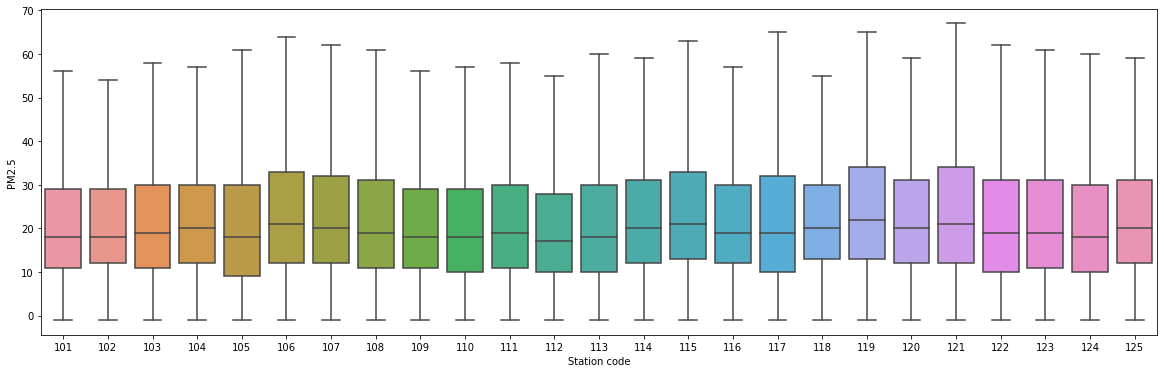

In [22]:
#Pm2.5 Levels by Stations
fig, axes = plt.subplots(1, 1, figsize=(20, 6))
sns.boxplot(x='Station code', y='PM2.5', data=df, showfliers=False);

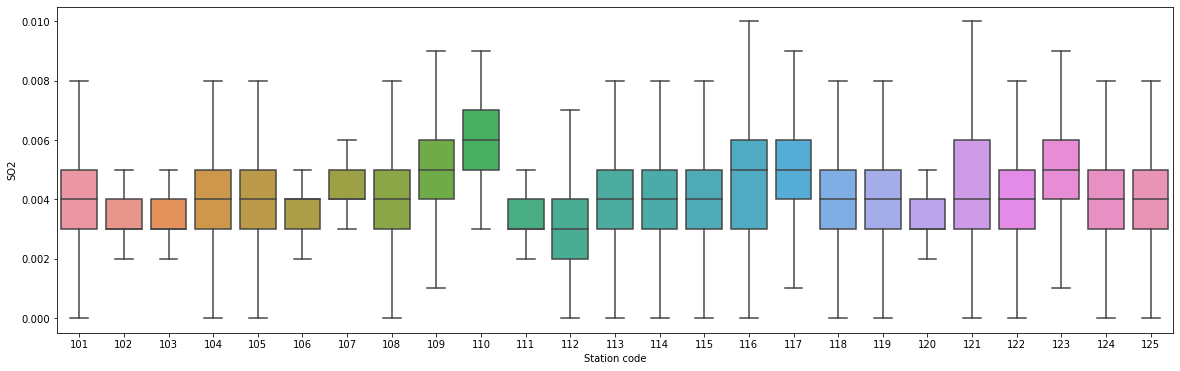

In [23]:
#SO2 Levels by Stations
fig, axes = plt.subplots(1, 1, figsize=(20, 6))
sns.boxplot(x='Station code', y='SO2', data=df, showfliers=False);

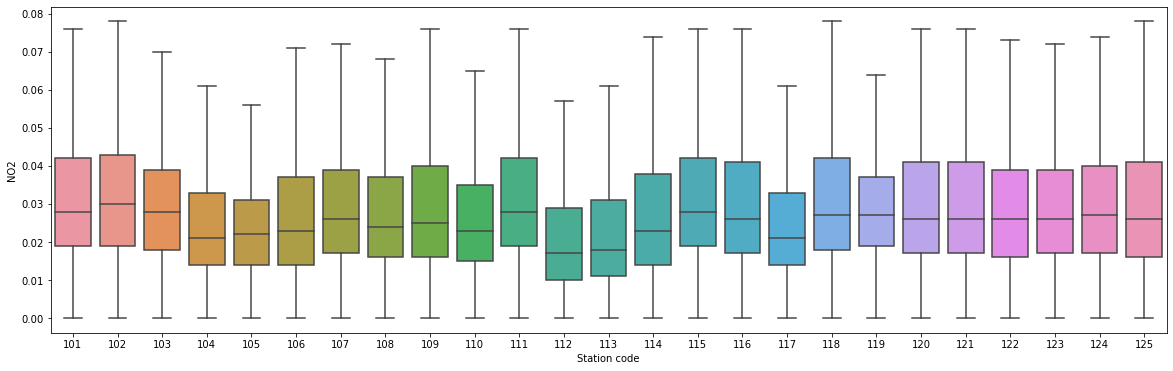

In [24]:
#NO2 Levels by Stations
fig, axes = plt.subplots(1, 1, figsize=(20, 6))
sns.boxplot(x='Station code', y='NO2', data=df, showfliers=False);

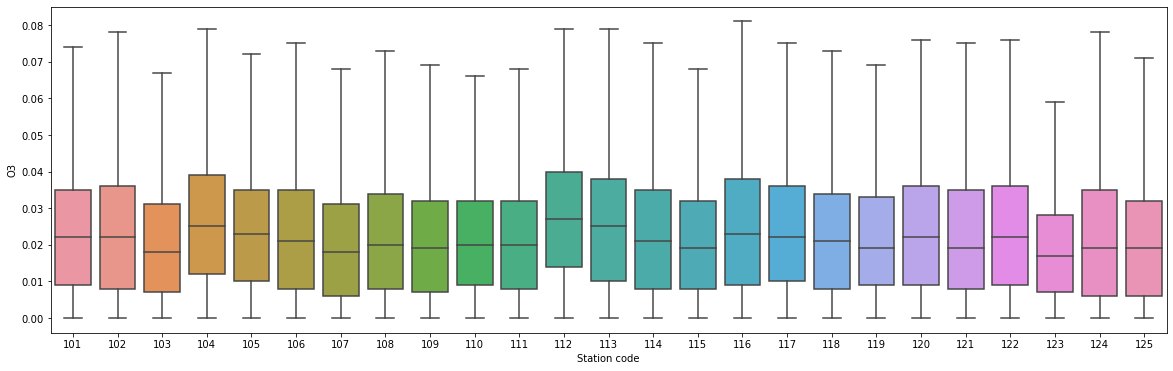

In [25]:
#O3 Levels by Stations
fig, axes = plt.subplots(1, 1, figsize=(20, 6))
sns.boxplot(x='Station code', y='O3', data=df, showfliers=False);

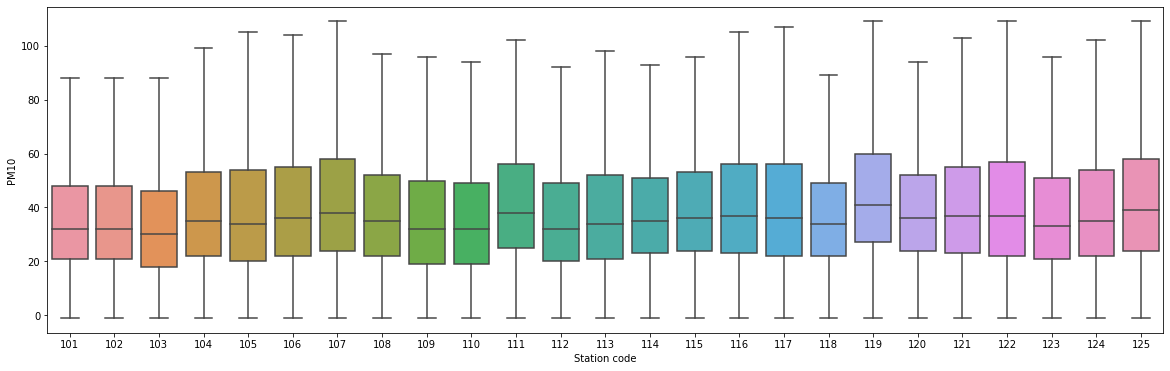

In [26]:
#PM10 Levels by Stations
fig, axes = plt.subplots(1, 1, figsize=(20, 6))
sns.boxplot(x='Station code', y='PM10', data=df, showfliers=False);

<AxesSubplot:xlabel='Measurement date'>

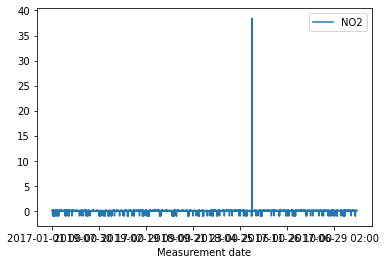

In [27]:
df.plot(x='Measurement date', y= 'NO2' )